# Explore here

In [7]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = "https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv"
df_raw = pd.read_csv(url)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   package_name  891 non-null    object
 1   review        891 non-null    object
 2   polarity      891 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.0+ KB


In [2]:
df_raw.sample(10,random_state=2025)

,package_name,review,polarity
622,com.uc.browser.en,good good for slow connection this uc minilit...,1
25,com.facebook.katana,can't install (error code: -505) have samsung...,0
307,com.tencent.mm,"bad new update, sight by swipe in chats gone ...",0
783,org.mozilla.firefox,"all you need, easy and gives you control open...",0
834,com.hamropatro,well done nicely designed .....this app had c...,1
109,com.linkedin.android,organization logo whenever i try to add my or...,0
339,com.viber.voip,issue in last online time it doesn't refresh ...,0
560,jabanaki.todo.todoly,"great, simple, recommend love this app. looki...",1
595,com.evernote,"neat idea, but let-down by no linux support. ...",0
509,com.Slack,free the gifs not reliable on a slower networ...,0


## Preprocessing

In [3]:
df_baking = df_raw.copy()
df_baking["review"] = df_baking["review"].str.strip().str.lower()
df_baking.drop("package_name", axis=1, inplace=True)
df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   review    891 non-null    object
 1   polarity  891 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.1+ KB


## EDA

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Separación de variables
X = df["review"]
y = df["polarity"]

# Dividir train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorización (matriz de frecuencias)
vec_model = CountVectorizer(stop_words="english")
X_train = vec_model.fit_transform(X_train).toarray()
X_test = vec_model.transform(X_test).toarray()

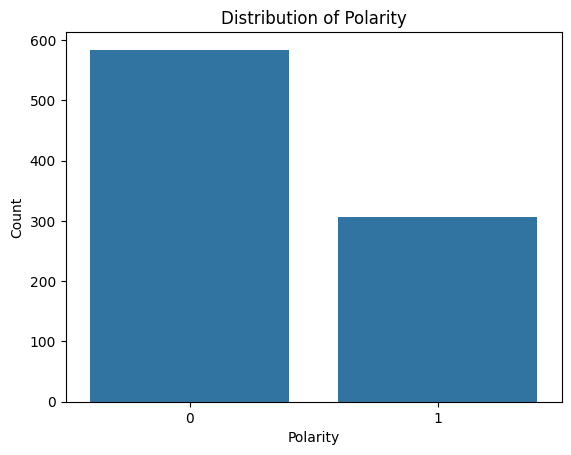

In [8]:
sns.countplot(x=y)
plt.title("Distribution of Polarity")
plt.xlabel("Polarity")
plt.ylabel("Count")
plt.show()

Este dataset esta desbalanceado

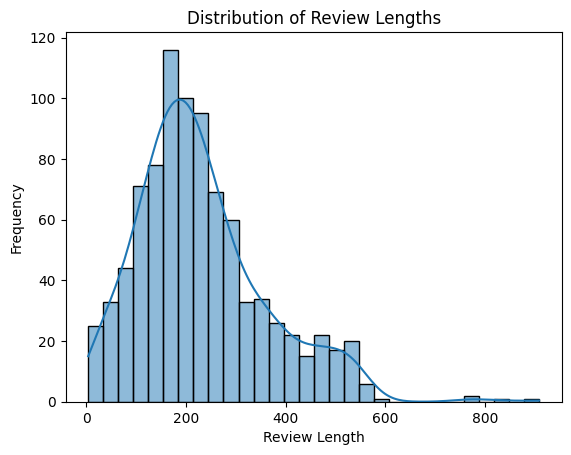

In [9]:
df['review_length'] = df['review'].apply(len)
sns.histplot(df['review_length'], bins=30, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.show()

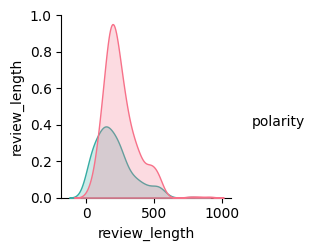

In [21]:
sns.pairplot(df, hue="polarity", palette="husl")
plt.show()

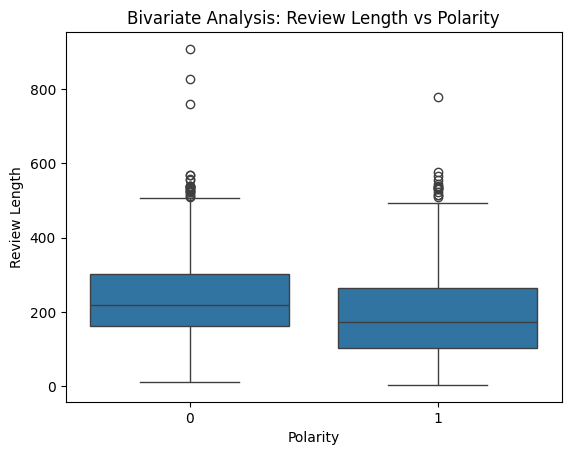

In [18]:
sns.boxplot(x='polarity', y='review_length', data=df)
plt.title("Bivariate Analysis: Review Length vs Polarity")
plt.xlabel("Polarity")
plt.ylabel("Review Length")
plt.show()

### Machine Learning

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import classification_report

# MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
print("MultinomialNB:\n", classification_report(y_test, mnb.predict(X_test)))

# GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("GaussianNB:\n", classification_report(y_test, gnb.predict(X_test)))

# BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
print("BernoulliNB:\n", classification_report(y_test, bnb.predict(X_test)))


MultinomialNB:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       126
           1       0.73      0.60      0.66        53

    accuracy                           0.82       179
   macro avg       0.79      0.75      0.77       179
weighted avg       0.81      0.82      0.81       179

GaussianNB:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       126
           1       0.69      0.62      0.65        53

    accuracy                           0.80       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.80      0.80      0.80       179

BernoulliNB:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85       126
           1       0.70      0.40      0.51        53

    accuracy                           0.77       179
   macro avg       0.74      0.66      0.68       179
weighted avg       0.76      0.

Accuracy: 0.82
F1 Score: 0.81
Random Forest:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       126
           1       0.64      0.74      0.68        53

    accuracy                           0.80       179
   macro avg       0.76      0.78      0.77       179
weighted avg       0.81      0.80      0.80       179



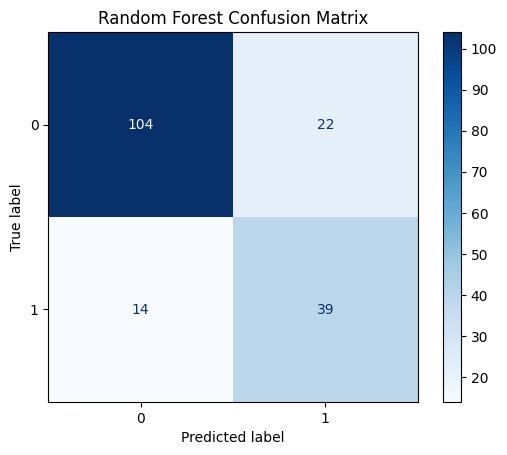

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import(
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    f1_score,
    accuracy_score,
    RocCurveDisplay,
)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
accuracy = accuracy_score(y_test, mnb.predict(X_test))
f1 = f1_score(y_test, mnb.predict(X_test), average='weighted')
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Random Forest:\n", classification_report(y_test, rf.predict(X_test)))

# confusion matrix
cm = confusion_matrix(y_test, rf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.show()

In [14]:
# Accuracy and F1 score for MultinomialNB
mnb_accuracy = accuracy_score(y_test, mnb.predict(X_test))
mnb_f1 = f1_score(y_test, mnb.predict(X_test), average='weighted')
print(f"MultinomialNB - Accuracy: {mnb_accuracy}, F1 Score: {mnb_f1}")

# Accuracy and F1 score for GaussianNB
gnb_accuracy = accuracy_score(y_test, gnb.predict(X_test))
gnb_f1 = f1_score(y_test, gnb.predict(X_test), average='weighted')
print(f"GaussianNB - Accuracy: {gnb_accuracy}, F1 Score: {gnb_f1}")

# Accuracy and F1 score for BernoulliNB
bnb_accuracy = accuracy_score(y_test, bnb.predict(X_test))
bnb_f1 = f1_score(y_test, bnb.predict(X_test), average='weighted')
print(f"BernoulliNB - Accuracy: {bnb_accuracy}, F1 Score: {bnb_f1}")

# Accuracy and F1 score for RandomForestClassifier
rf_accuracy = accuracy_score(y_test, rf.predict(X_test))
rf_f1 = f1_score(y_test, rf.predict(X_test), average='weighted')
print(f"Random Forest - Accuracy: {rf_accuracy}, F1 Score: {rf_f1}")

MultinomialNB - Accuracy: 0.8156424581005587, F1 Score: 0.810268366939608
GaussianNB - Accuracy: 0.8044692737430168, F1 Score: 0.8015314541475235
BernoulliNB - Accuracy: 0.770949720670391, F1 Score: 0.7487923048211128
Random Forest - Accuracy: 0.7988826815642458, F1 Score: 0.8026424243592771


Se ha conseguido un mejor resultado con el Random Forest con un accuracy de 0.82

## Guardar el modelo

In [17]:
import joblib

joblib.dump(mnb, "/workspaces/Naive-Bayes/models/multinomial_nb_sentiment.pkl")
joblib.dump(vec_model, "/workspaces/Naive-Bayes/models/count_vectorizer.pkl")

['/workspaces/Naive-Bayes/models/count_vectorizer.pkl']

## Paso 6: Explora otras alternativas

Logistic Regression también funciona muy bien para problemas lineales y escala con facilidad.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("Logistic Regression:\n", classification_report(y_test, lr.predict(X_test)))
print("Logistic Regression - Accuracy: ", accuracy_score(y_test, lr.predict(X_test)))
print("Logistic Regression - F1 Score: ", f1_score(y_test, lr.predict(X_test), average='weighted'))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.91      0.84      0.88       126
           1       0.68      0.81      0.74        53

    accuracy                           0.83       179
   macro avg       0.80      0.83      0.81       179
weighted avg       0.85      0.83      0.84       179

Logistic Regression - Accuracy:  0.8324022346368715
Logistic Regression - F1 Score:  0.8361635125001791


En efecto, se consiguio un accuracy mucho mayor